In [1]:
import sys
sys.path.insert(0, '_libs/')

In [18]:
import glob
import scipy.io
import datetime
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [3]:
ANHA4_MAT=scipy.io.loadmat('_data/Exchange/coord_ANHA4.mat')
nav_lat = ANHA4_MAT['nav_lat']
nav_lon = ANHA4_MAT['nav_lon']

In [5]:
ice_name = '/ocean/yingkai/GEOTRACES/ileadfra_monmean.nc'
ice_obj = nc.Dataset(ice_name)
ice = np.transpose(ice_obj.variables['ileadfra'][:], [0, 2, 1])

In [10]:
from dateutil.relativedelta import relativedelta

base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

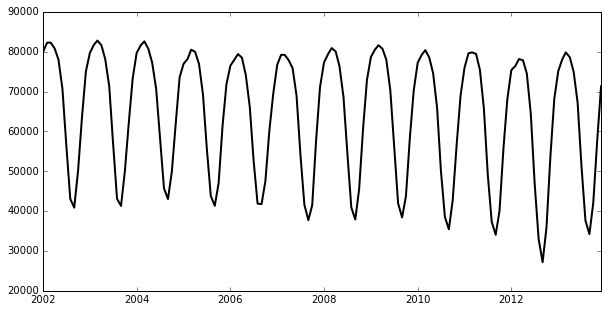

In [16]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
ax.plot(date_list, np.nansum(np.nansum(ice, 1), 1), 'k-', lw=2)

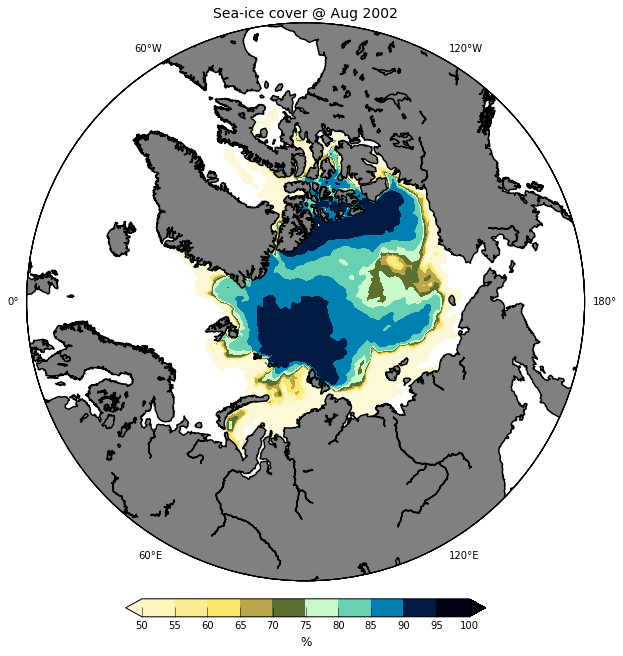

In [23]:
lev = np.arange(50, 105, 5)
fig=plt.figure(figsize=(10, 10));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color='gray', lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, ice[8, :, :]*100, lev, cmap=cm.GMT_relief_r, extend='both')

cax = fig.add_axes([0.2625, 0.075, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('%', fontsize=12)
CBar.ax.tick_params(axis='x', length=10)
CBar.set_ticks(lev)
ax.set_title('Sea-ice cover @ Aug 2002', fontsize=14)

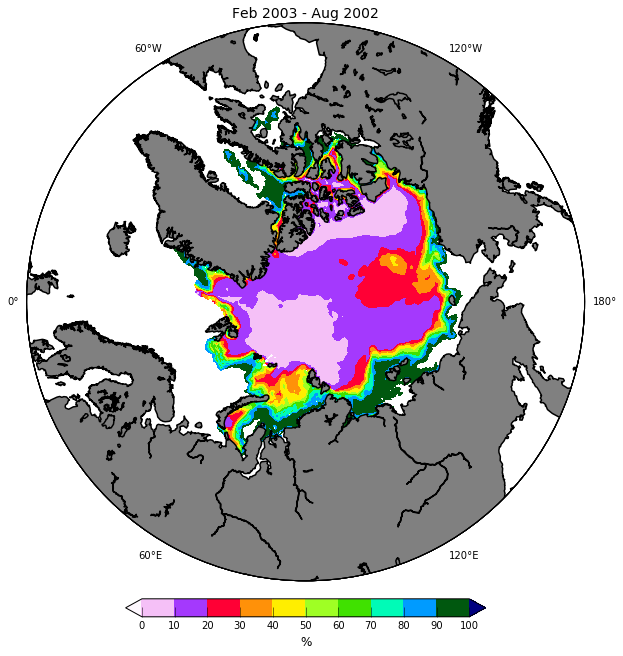

In [30]:
lev2 = np.arange(0, 110, 10)
fig=plt.figure(figsize=(10, 10));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color='gray', lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, (ice[13, :, :]-ice[8, :, :])*100, lev2, cmap=plt.cm.gist_ncar_r, extend='both')

cax = fig.add_axes([0.2625, 0.075, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('%', fontsize=12)
CBar.ax.tick_params(axis='x', length=10)
CBar.set_ticks(lev2)
ax.set_title('Feb 2003 - Aug 2002', fontsize=14)